In [ ]:
	Cont_start
0	233.49578637440644
1	354.3907297065126
2	369.77158053014637
3	431.02269253679225
4	522.2490899172114
5	645.609082196294
6	661.7283603060424
7	769.5275048710034
8	829.9012974918107
9	844.8230151935657
10	875.7009066183343
11	952.0185299028632
12	1011.6538678834736
13	1072.018667542692
14	1161.3573888948677
15	1252.5222556842534
16	1268.2250658793769
17	1314.2784260088924


In [35]:
a = [233.49578637440644,
354.3907297065126,
369.77158053014637,
431.02269253679225,
522.2490899172114,
645.609082196294,
661.7283603060424,
769.5275048710034,
829.9012974918107,
844.8230151935657,
875.7009066183343,
952.0185299028632,
1011.6538678834736,
1072.018667542692,
1161.3573888948677,
1252.5222556842534,
1268.2250658793769]

print(a)

[233.49578637440644, 354.3907297065126, 369.77158053014637, 431.02269253679225, 522.2490899172114, 645.609082196294, 661.7283603060424, 769.5275048710034, 829.9012974918107, 844.8230151935657, 875.7009066183343, 952.0185299028632, 1011.6538678834736, 1072.018667542692, 1161.3573888948677, 1252.5222556842534, 1268.2250658793769]


In [42]:
%matplotlib widget
import spikeinterface.full as si
import ipywidgets as widgets
import numpy as np

# --- Load recording ---
recording =  si.read_spikeglx("E:/Florian_paper/Florian/Data/batch3/M7_2",stream_id='imec0.ap', load_sync_channel=False)
rec1 = si.highpass_filter(recording, freq_min=400.)
rec1 = si.phase_shift(rec1)

recording = si.common_reference(rec1, operator="median", reference="global")
fs = recording.get_sampling_frequency()

timepoints = a
window_start_ms = 10  # e.g., -10 ms before event
window_end_ms = 40     # e.g., +20 ms after event
window_start_s = window_start_ms / 1000
window_end_s = window_end_ms / 1000

# --- Build dict of sliced recordings ---
recording_slices = {}
for i, t in enumerate(timepoints):
    start_sample = max(int((t + window_start_s) * fs), 0)
    end_sample = int((t + window_end_s) * fs)
    sliced = recording.frame_slice(start_frame=start_sample, end_frame=end_sample)
    label = f"timepoint_{i+1} ({t:.2f}s)"
    recording_slices[label] = sliced

# --- UI elements ---
dropdown = widgets.Dropdown(
    options=recording_slices.keys(),
    value=list(recording_slices.keys())[0],
    description='Timepoint:'
)

output = widgets.Output()

# --- Plot update function ---
def update_plot(change):
    output.clear_output(wait=True)
    with output:
        si.plot_traces(
            recording_slices[change['new']],
            backend='ipywidgets',
            time_range=(window_start_s, window_end_s)
        )

dropdown.observe(update_plot, names='value')

# --- Show everything ---
display(dropdown, output)
update_plot({'new': dropdown.value})


Dropdown(description='Timepoint:', options=('timepoint_1 (233.50s)', 'timepoint_2 (354.39s)', 'timepoint_3 (36…

Output()

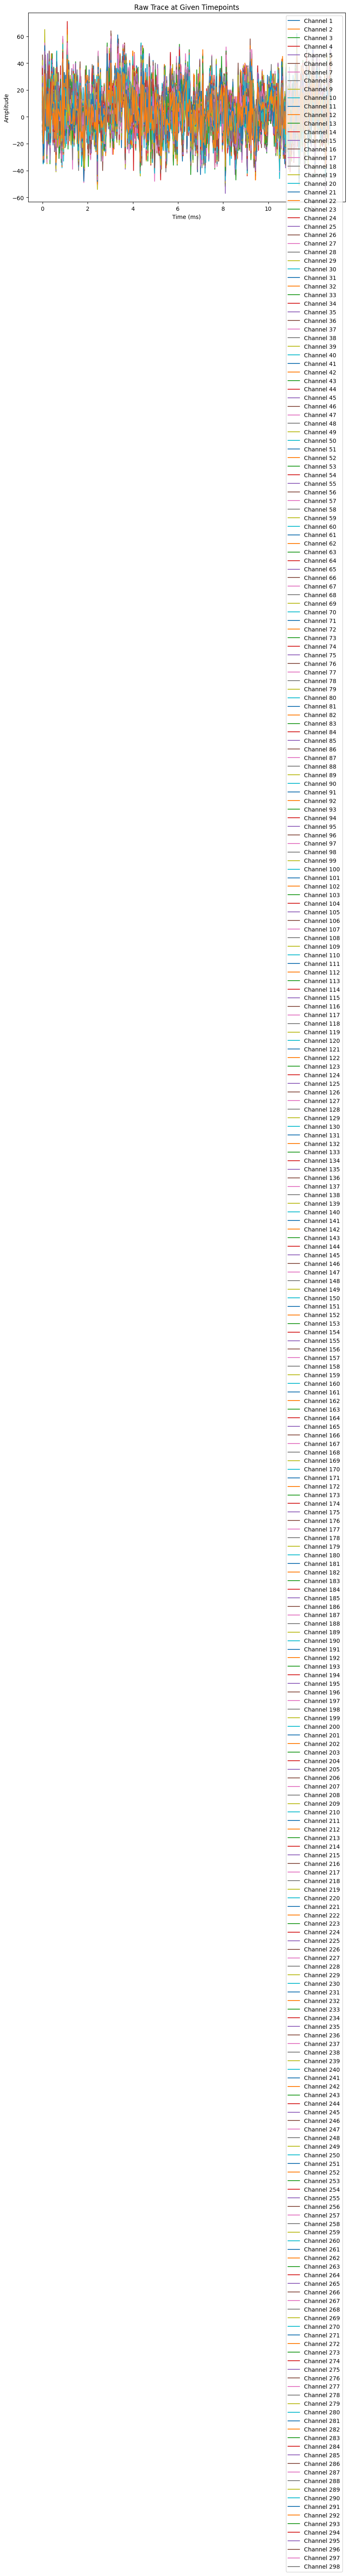

In [21]:
import spikeinterface.full as si
import matplotlib.pyplot as plt

def plot_traces_at_timepoints(spikeglx_file, timepoints, window_ms=10, channel_subset=None):
    # Load the spikeglx file using spikeinterface
    recording = si.read_spikeglx(spikeglx_file, stream_id='imec0.ap', load_sync_channel=False)
    
    # Default window is set to 10 ms (you can change this if needed)
    # Convert window from ms to samples
    sample_rate = recording.get_sampling_frequency()
    window_samples = int(window_ms * sample_rate / 1000)
    
    # Ensure timepoints are in samples
    timepoints_samples = [int(tp * sample_rate) for tp in timepoints]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    for i, tp in enumerate(timepoints_samples):
        # Define start and end indices for the trace window
        start_sample = tp - window_samples // 2
        end_sample = tp + window_samples // 2
        
        # Get the trace for the given timepoint and window
        trace = recording.get_traces(start_frame=start_sample, end_frame=end_sample, channel_ids=channel_subset)
        
        # Time axis (in ms)
        import numpy as np  # add this at the top of your script if not already there

        time_axis = np.arange(trace.shape[1]) / sample_rate * 1000  # in ms


        
        # Plot the traces for the given timepoint
        for channel_id in range(trace.shape[0]):
            plt.plot(time_axis, trace[channel_id, :], label=f'Channel {channel_id+1}' if i == 0 else "")
    
    plt.title('Raw Trace at Given Timepoints')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Example usage
spikeglx_file = 'path_to_your_spikeglx_file'  # Replace with your file path
timepoints = [1.0, 2.5, 4.0]  # Replace with your desired timepoints in seconds
plot_traces_at_timepoints("E:/Florian_paper/Florian/Data/batch3/M7_2", a)
